In [1]:
import pandas as pd 
from os import listdir
import os
import matplotlib.pyplot as plt
from scipy import stats
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False, figsize=(30, 8))

In [2]:
file1 = 'BSWUSAM000000191362_DEPTH/'
file1_before = 'BSWUSAM000000191362_BEFORE/'
file2 = 'BSWUSAM000000193323_DEPTH/'
file2_before = 'BSWUSAM000000193323_BEFORE/'

files1 = sorted([f for f in listdir(file1)])
files1_before = sorted([f for f in listdir(file1_before)])
files2 = sorted([f for f in listdir(file2)])
files2_before = sorted([f for f in listdir(file2_before)])
len(files1), len(files1_before), len(files2), len(files2_before)

(1240, 1240, 1316, 1316)

# BSWUSAM000000191362 organism

In [3]:
df_62IN = pd.DataFrame()
files = []

for i in range(len(files1)):
    file = file1+files1[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_62IN = df_62IN.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_62IN['File'] = files
df_62IN.head()

,Chr,Place,Depth,File
0,Chr1,113199801,22,0
1,Chr1,113199802,22,0
2,Chr1,113199803,23,0
3,Chr1,113199804,23,0
4,Chr1,113199805,24,0


In [4]:
df_62BEFORE = pd.DataFrame()
files = []

for i in range(len(files1_before)):
    file = file1_before+files1_before[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_62BEFORE = df_62BEFORE.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_62BEFORE['File'] = files
df_62BEFORE.head()

,Chr,Place,Depth,File
0,Chr1,113199301,6,0
1,Chr1,113199302,6,0
2,Chr1,113199303,6,0
3,Chr1,113199304,6,0
4,Chr1,113199305,6,0


In [5]:
df_62IN = df_62IN[df_62IN.File.isin(df_62BEFORE.File)]
len(df_62BEFORE.File.unique()), len(df_62IN.File.unique())

(1230, 1230)

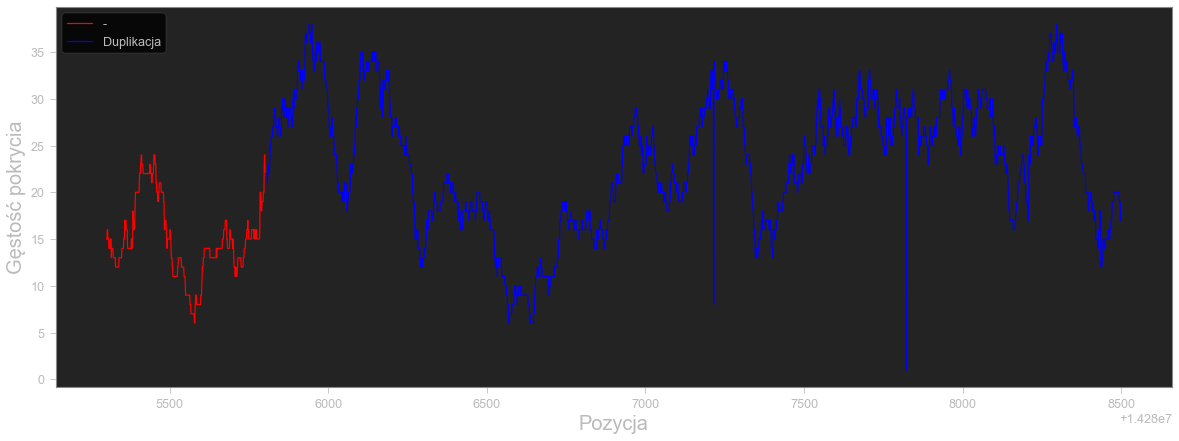

In [6]:
def plot(number_of_file):
    sub_df1 = df_62BEFORE[df_62BEFORE.File==number_of_file]
    sub_df2 = df_62IN[df_62IN.File==number_of_file]
    plt.figure(figsize=(20,7))
    plt.plot(sub_df1.Place, sub_df1.Depth, color="red")
    plt.plot(sub_df2.Place, sub_df2.Depth,color="blue")
    plt.legend(["-", "Duplikacja"], facecolor ='black', markerscale=50)
    plt.xlabel("Pozycja", fontsize=20)
    plt.ylabel("Gęstość pokrycia", fontsize=20)
plot(6)

# Mean difference

In [7]:
idx = df_62BEFORE.File.unique()
means_before62 = []
means_in62 = []

for i in idx:
    sub_df_before = df_62BEFORE[df_62BEFORE.File==i]
    sub_df_in = df_62IN[df_62IN.File==i]
    means_before62.append(sub_df_before.Depth.mean())
    means_in62.append(sub_df_in.Depth.mean())

Text(0.5, 0, 'Duplikacje')

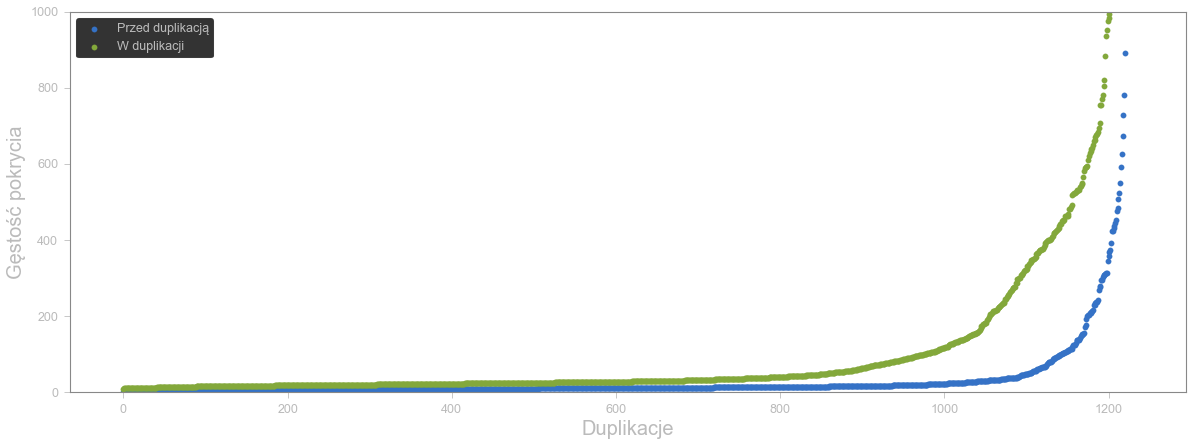

In [8]:
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(20,7))

plt.ylim(0,1000)
plt.scatter([i for i in range(len(means_before62))], sorted(means_before62))
plt.scatter([i for i in range(len(means_before62))], sorted(means_in62))
plt.legend(["Przed duplikacją", "W duplikacji"], facecolor ='black' )
plt.ylabel("Gęstość pokrycia", fontsize=20)
plt.xlabel("Duplikacje", fontsize=20)

In [10]:
from scipy import stats
from scipy.stats import wilcoxon

stats.shapiro(means_before62)
stats.shapiro(means_in62) #Brak rozkładu normalnego

(0.3866084814071655, 0.0)

In [11]:
stat, p = wilcoxon(means_before62, means_in62)
stat, p #p_value <0.05 Istnieją różnice

(27361.0, 9.444003183832414e-175)